# PHASE ONE:

<b>TOPIC: ONLINE PAYMENT FRAUD DETECTION</b>

# Stage one: Problem Definition
<div style="position:relative">
  <div style="margin-top:50px">
  
  <b>Background:</b> Online payment fraud is a significant concern for financial institutions, e-commerce platforms, and consumers. Fraudsters continually devise new methods to exploit vulnerabilities in online payment systems, resulting in financial losses and security breaches. It is imperative to develop advanced fraud detection systems to protect consumers and businesses from fraudulent online transactions.

  <b>Problem Statement: </b>Online payment fraud poses a critical threat to financial institutions, e-commerce platforms, and consumers alike. Fraudsters persistently devise novel tactics to exploit vulnerabilities in online payment systems, resulting in substantial financial losses and security breaches. There exists an urgent need to construct cutting-edge fraud detection systems that can safeguard consumers and businesses against deceitful online transactions.
  
  <b>Project Objective:</b> The primary objective of this project is to develop a robust online payment fraud detection system that can swiftly identify and prevent fraudulent transactions in real-time. The system's scope encompasses the scrutiny of diverse online payment transactions, including credit card payments, digital wallet transfers, and online banking transactions.</b>.
    </p>
  </div>
      <p>
          <img src="https://dailyalts.com/wp-content/uploads/2021/05/online-4533485_640.jpg"  >
      </p>

    
</div>

<h2>Stage Two: Project Idea Validation</h2>

<h4>The project idea was validated by my instructor</h4>


<h2>Stage Three: Data Gathering</h2>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [5]:
data = pd.read_csv('onlinefraud.csv')
data.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0


<h2>Stage Three: Exploratory Data Analysis</h2>

In [6]:
data.shape

(6362620, 11)

Below are all the columns from the dataset:

<b>step:</b> represents a unit of time where 1 step equals 1 hour

<b>type:</b> type of online transaction

<b>amount:</b> the amount of the transaction

<b>nameOrig:</b> customer starting the transaction

<b>oldbalanceOrg:</b> balance before the transaction

<b>newbalanceOrig:</b> balance after the transaction

<b>nameDest:</b> recipient of the transaction

<b>oldbalanceDest:</b> initial balance of recipient before the transaction

<b>newbalanceDest:</b> the new balance of recipient after the transaction

<b>isFraud:</b> fraud transaction

In [7]:
# Summary statistics for numerical columns
data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df = data.copy()
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df.duplicated().any()

False

<h1>Phase Two: Data Visualization and Model Selection</h1>

<Axes: xlabel='step', ylabel='Density'>

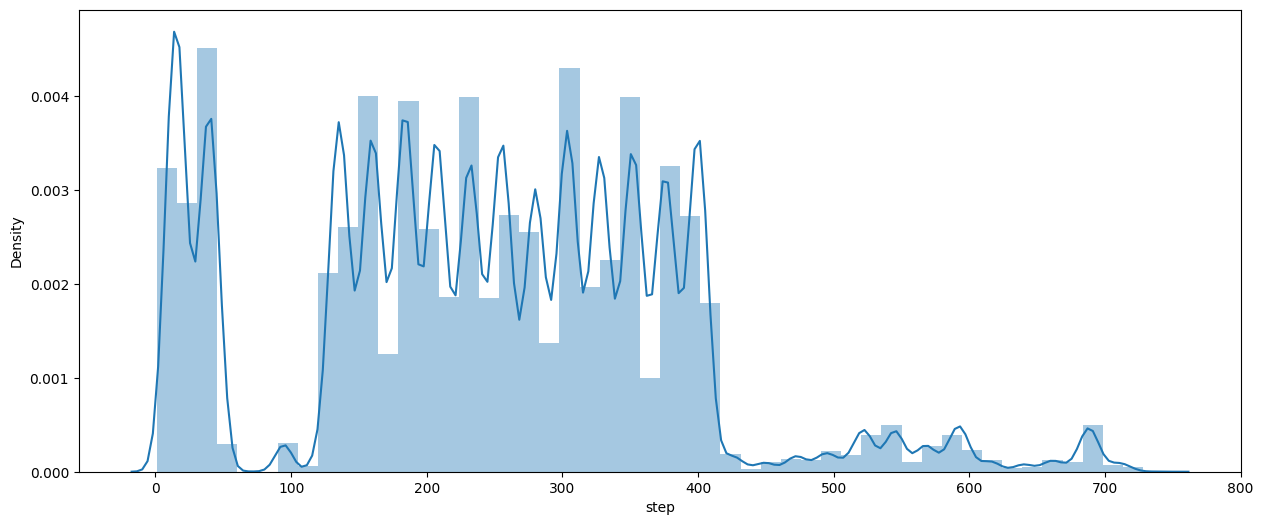

In [11]:
plt.figure(figsize=(15, 6))
sns.distplot(df['step'], bins=50)

The distribution plot of the 'step' data reveals that most of the data points are concentrated within a specific range of time steps(-1 to 1). There is a clear peak in the distribution, indicating a unimodal pattern. The majority of data points fall within the bins around the peak, suggesting that these time steps are the most common in the dataset. However, there are a few outliers with time steps that are far from the peak, indicating some unusual or infrequent occurrences."

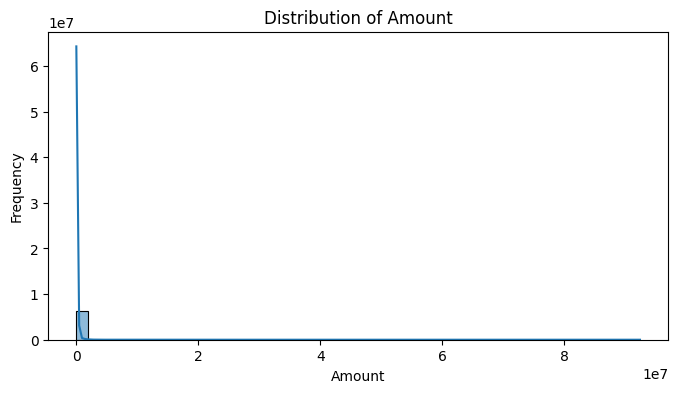

In [12]:
# Creating a histogram of the 'amount' column
plt.figure(figsize=(8, 4))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Count')

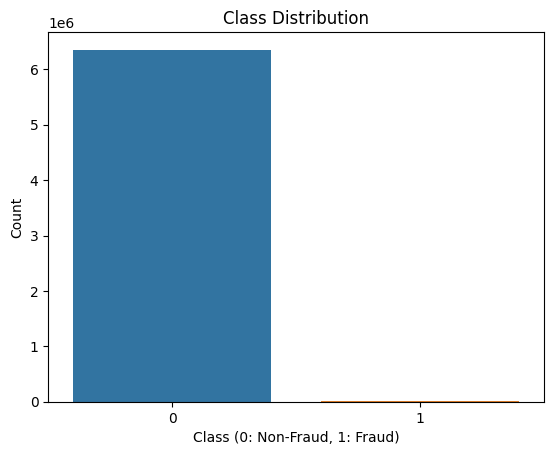

In [13]:
# Count and visualize the class distribution
class_counts = df['isFraud'].value_counts()
sns.countplot(x='isFraud', data=df)
plt.title('Class Distribution')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')


there is imbalance in the dataset which can lead to biased model performance. so we will be adopting some special techniques, such as oversampling, undersampling, or using different evaluation metrics, to address this class imbalance and build an effective predictive model.

In [14]:
# #Correlation matrix
# correlation_matrix = df.corr()

# # Visualize the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()


# # Assuming 'df' is your DataFrame

# # Encode non-numeric columns to numeric
# df_encoded = pd.get_dummies(df)

# # Calculate the correlation matrix
# correlation_matrix = df_encoded.corr()

# # Visualize the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix')





*   There is a strong positive relationship between "new balance Dest" and "old balance Dest"
*   There is a moderate postive relationship between "newbalanceDest" and "amount"
*   The rest of the features have a weak relationship between one another






Text(0, 0.5, 'Amount')

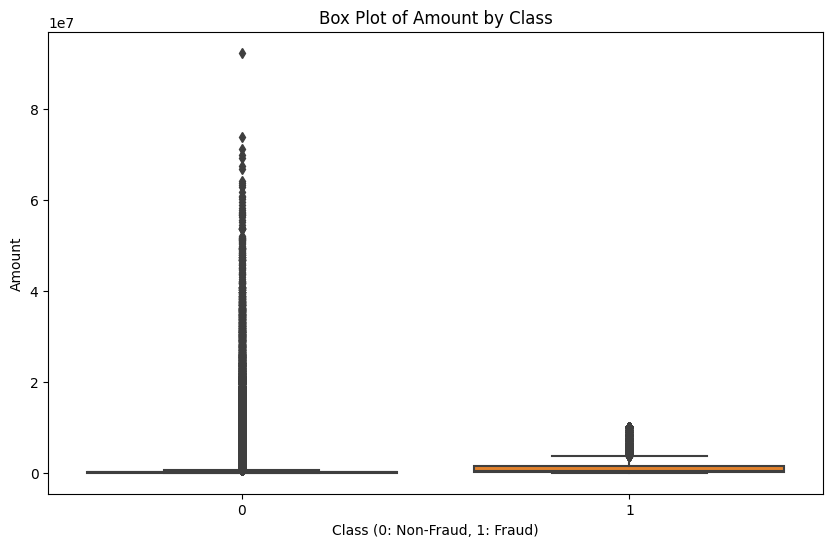

In [15]:
# Create box plots for 'amount' by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Box Plot of Amount by Class')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Amount')


The box plot of 'Amount' by class provides valuable insights into the differences between non-fraudulent and fraudulent transactions. In the case of non-fraudulent transactions (Class 0), we observe a wide range of 'amount' values, with a median 'amount' value that is relatively higher. This suggests that most non-fraudulent transactions have moderate to high 'amounts,' and some transactions have very large 'amounts,' exceeding 6 million.

Conversely, for fraudulent transactions (Class 1), the box plot reveals a narrower range of 'amount' values, with a median 'amount' that is significantly lower than that of non-fraudulent transactions. This indicates that fraudulent transactions predominantly involve lower 'amounts,' with very few, if any, cases exceeding 10,000. In other words, most fraudulent transactions are associated with smaller 'amounts.'

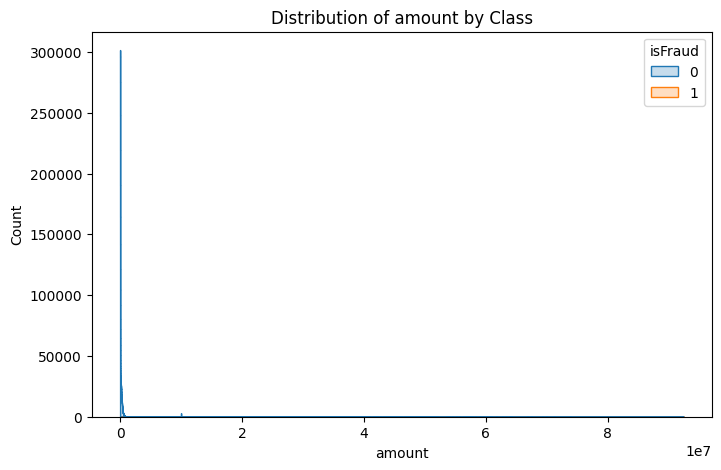

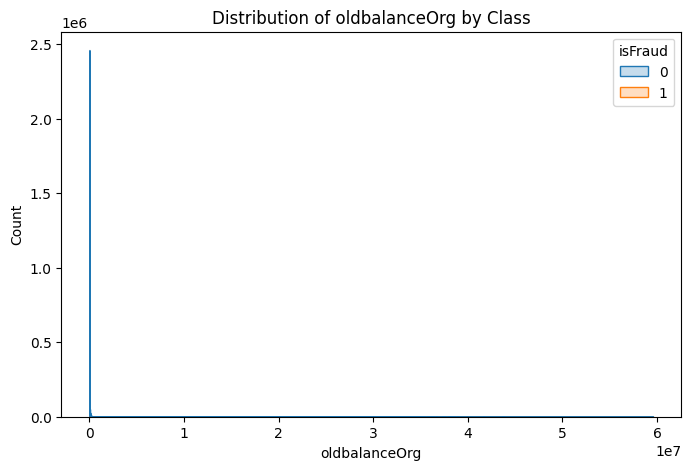

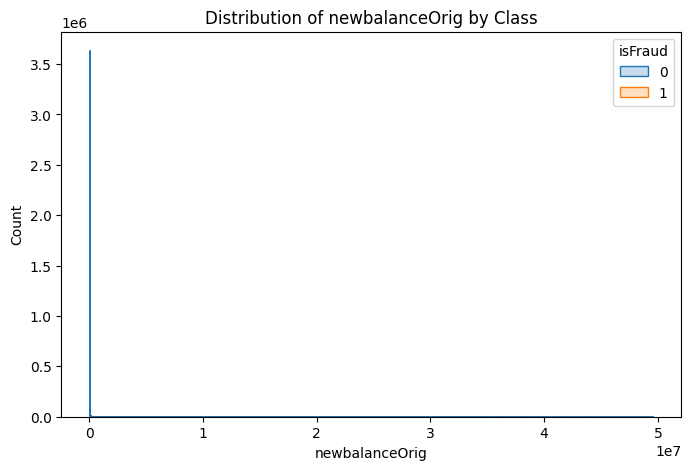

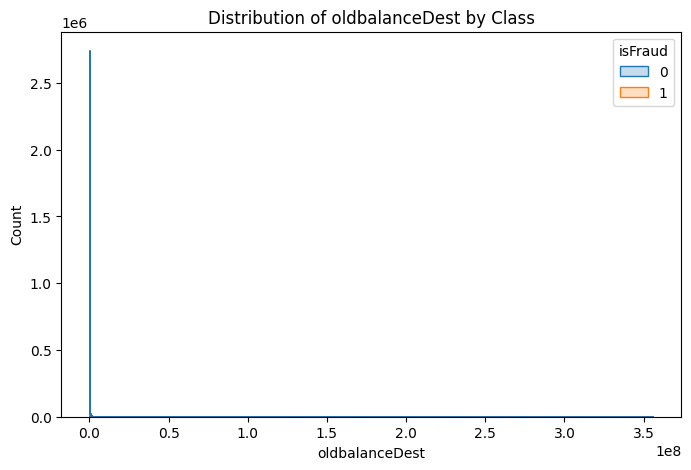

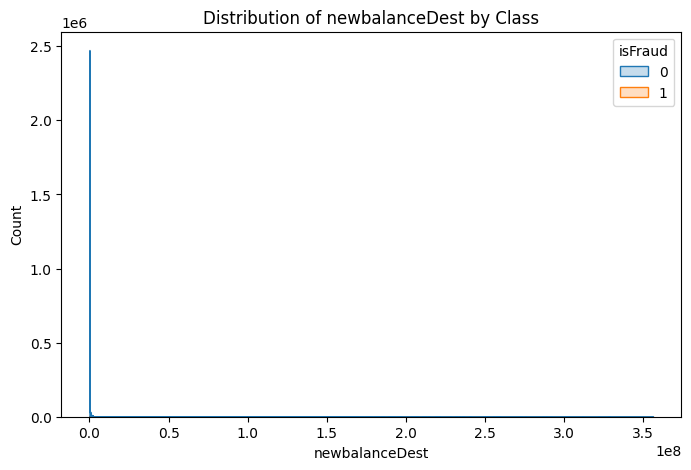

In [16]:
features_of_interest = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for feature in features_of_interest:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=feature, hue='isFraud', element='step', common_norm=False)
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Count')


In [17]:
cat = df.select_dtypes(include = ['category', 'object'])
num = df.select_dtypes(include = 'number')
display(cat.head())
display(num.head())

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


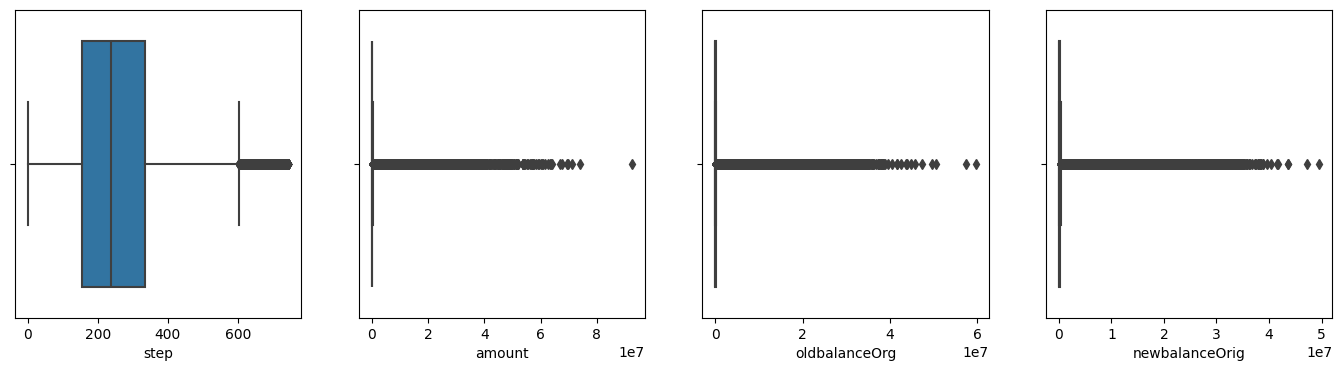

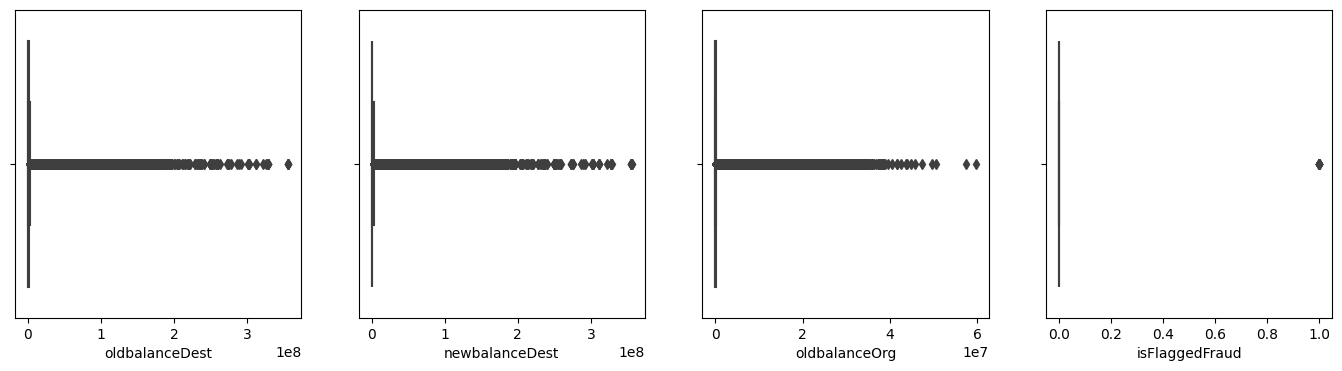

In [18]:
# ------------checking the outliers in the dataset---------------
def OutlierChecker(dataframe, a, b, c, d):
    plt.figure(figsize=(17, 4))

    plt.subplot(1, 4, 1)
    sns.boxplot(x=dataframe[a])

    plt.subplot(1, 4, 2)
    sns.boxplot(x=dataframe[b])

    plt.subplot(1, 4, 3)
    sns.boxplot(x=dataframe[c])

    plt.subplot(1, 4, 4)
    sns.boxplot(x=dataframe[d])

OutlierChecker(df, 'step', 'amount' , 'oldbalanceOrg', 'newbalanceOrig')
OutlierChecker(df, 'oldbalanceDest', 'newbalanceDest' , 'oldbalanceOrg', 'isFlaggedFraud')

In [19]:
# ---------------removing the outliers----------------
def outlierRemoval(dataframe):
    for i in dataframe.columns:
      if i in dataframe.select_dtypes(include = 'number').columns:
          Q1 = dataframe[i].describe()[4]  # Index 3 for Q1 (25th percentile)
          Q3 = dataframe[i].describe()[6]  # Index 7 for Q3 (75th percentile)
          IQR = Q3 - Q1
          lowerIQR = Q1 - 1.5 * IQR
          upperIQR = Q3 + 1.5 * IQR
          dataframe = dataframe.loc[(dataframe[i] >= lowerIQR) & (dataframe[i] <= upperIQR)]
    return dataframe

outlierRemoval(df)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6259906,601,PAYMENT,3.04,C960748220,25287.00,25283.96,M313631875,0.00,0.00,0,0
6259907,601,PAYMENT,13232.49,C737614907,25283.96,12051.47,M1594503804,0.00,0.00,0,0
6259908,601,PAYMENT,2221.70,C2025555227,496.00,0.00,M1739698995,0.00,0.00,0,0
6259910,601,PAYMENT,5542.37,C1586821392,465.00,0.00,M878113242,0.00,0.00,0,0


In [20]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [21]:
#label encode categorical columns and standard scale numerical columns
from sklearn.preprocessing import StandardScaler, LabelEncoder

def transformer(dataframe):
    lb = LabelEncoder()
    scaler = StandardScaler()

    dep = dataframe.drop(['isFraud', 'isFlaggedFraud'] ,axis = 1)

    for i in dep.columns:
        if i in dataframe.select_dtypes(include='number').columns:
            # Scale only numerical columns
            dataframe[[i]] = scaler.fit_transform(dataframe[[i]])
        elif i in dataframe.select_dtypes(include=['object', 'category']).columns:
            # Label encode categorical columns
            dataframe[i] = lb.fit_transform(dataframe[i])

    return dataframe


transformer(df)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,-1.703042,3,-0.281560,757869,-0.229810,-0.237622,1662094,-0.323814,-0.333411,0,0
1,-1.703042,3,-0.294767,2188998,-0.281359,-0.285812,1733924,-0.323814,-0.333411,0,0
2,-1.703042,4,-0.297555,1002156,-0.288654,-0.292442,439685,-0.323814,-0.333411,1,0
3,-1.703042,1,-0.297555,5828262,-0.288654,-0.292442,391696,-0.317582,-0.333411,1,0
4,-1.703042,3,-0.278532,3445981,-0.274329,-0.282221,828919,-0.323814,-0.333411,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,3.510123,1,0.264665,5651847,-0.171108,-0.292442,505863,-0.323814,-0.240959,1,0
6362616,3.510123,4,10.153953,1737278,1.896491,-0.292442,260949,-0.323814,-0.333411,1,0
6362617,3.510123,1,10.153953,533958,1.896491,-0.292442,108224,-0.303665,1.403027,1,0
6362618,3.510123,4,1.109765,2252932,0.005581,-0.292442,319713,-0.323814,-0.333411,1,0


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

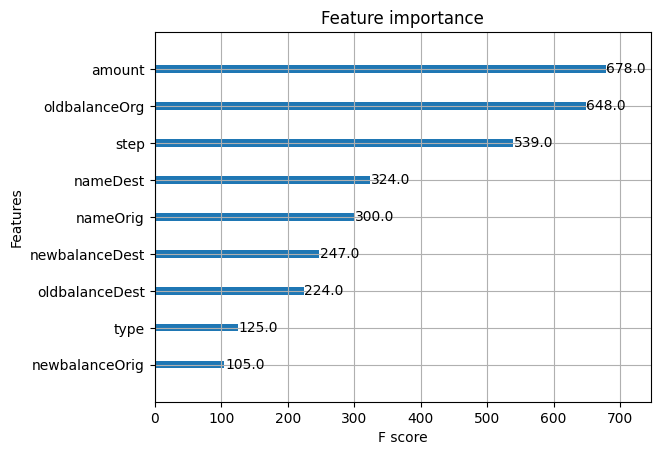

In [22]:
# %pip install xgboost
import xgboost as xgb

X = df.drop('isFraud', axis=1)
Y = df.isFraud

# Create and train an XGBoost model
model = xgb.XGBClassifier()
model.fit(X, Y)

# Print feature importance scores
xgb.plot_importance(model)

In [23]:
# ANOVA F-value between label/feature

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_feature1 = SelectKBest(score_func = f_classif, k = 'all')
fitting1 = best_feature1.fit(X,Y)
scores1 = pd.DataFrame(fitting1.scores_)
columns1 = pd.DataFrame(X.columns)
feat_score1 = pd.concat([columns1, scores1], axis = 1)
feat_score1.columns = ['Feature', 'F_classif_score']
k1 = feat_score1.nlargest(10, 'F_classif_score')
k1.reset_index(drop = True, inplace = True)

k1.sort_values(by = 'F_classif_score', ascending = False)

,Feature,F_classif_score
0,amount,37640.657952
1,isFlaggedFraud,12403.376850
2,step,6350.771614
3,nameDest,3070.758853
4,type,2762.765888
5,oldbalanceOrg,656.131724
6,newbalanceOrig,422.458367
7,oldbalanceDest,220.386451
8,newbalanceDest,1.823504
9,nameOrig,1.368524


In [24]:
# ---------------Feature selection------------------------
x = df[['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'step']]

y = df.isFraud

Fixing the imbalance

In [25]:
#----------------------------------Under Sampling-------------------------------
temdf = df.loc[df.isFraud== 0] #------------------------------------------------ locate class of 0
temdf = df.sample(15000)
data = pd.concat([temdf, df.loc[df.isFraud== 1]], axis = 0) #------------------- concat the sample of class of 0 and the class of 1
data.reset_index(drop = True, inplace = True) #--------------------------------- rest the index
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.601430,3,-0.295111,1876389,-0.288716,-0.292442,2668845,-0.323814,-0.333411,0,0
1,2.484352,1,-0.281245,4094957,-0.288716,-0.292442,238000,-0.260812,-0.272395,0,0
2,2.463275,3,-0.286848,3695603,-0.288716,-0.292442,2090209,-0.323814,-0.333411,0,0
3,-0.712400,3,-0.284882,463234,-0.288716,-0.292442,983225,-0.323814,-0.333411,0,0
4,0.207984,0,-0.157334,3965533,6.525677,6.467527,496296,0.021418,-0.037109,0,0
...,...,...,...,...,...,...,...,...,...,...,...
23208,3.510123,1,0.264665,5651847,-0.171108,-0.292442,505863,-0.323814,-0.240959,1,0
23209,3.510123,4,10.153953,1737278,1.896491,-0.292442,260949,-0.323814,-0.333411,1,0
23210,3.510123,1,10.153953,533958,1.896491,-0.292442,108224,-0.303665,1.403027,1,0
23211,3.510123,4,1.109765,2252932,0.005581,-0.292442,319713,-0.323814,-0.333411,1,0


<h1>Phase Three: Model Training and Testing</h1>

In [26]:
#split into train and test
from sklearn.model_selection import train_test_split
x = data.drop('isFraud',axis = 1)
y = data.isFraud

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify = y)



<Axes: xlabel='isFraud', ylabel='count'>

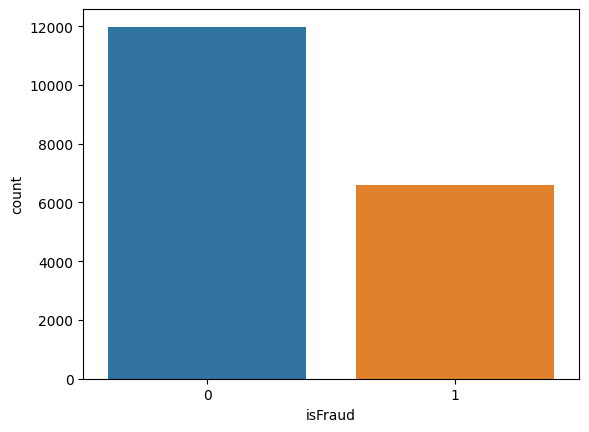

In [27]:
sns.countplot(x = ytrain)

In [28]:
# oversampling the train dataset using ADASYN
# %pip install imbalanced-learn

from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=1)
xtrain_ada, ytrain_ada = ada.fit_resample(xtrain, ytrain)

<Axes: xlabel='isFraud', ylabel='count'>

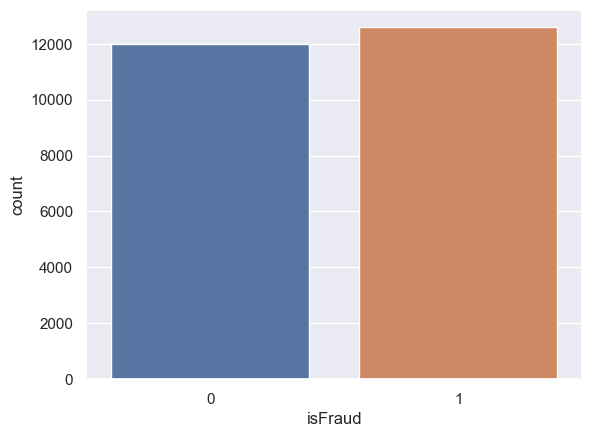

In [29]:
sns.set(style = 'darkgrid')
sns.countplot(x = ytrain_ada)

In [30]:
# -----------------NAIVE BAYES-----------------------
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

gnb_Model = GaussianNB()
gnb_Model.fit(xtrain_ada, ytrain_ada)

# make predictions on the training data
gnb_train_pred = gnb_Model.predict(xtrain_ada)

# print classification report
print(classification_report(ytrain_ada, gnb_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.34      0.51     11983
           1       0.61      1.00      0.76     12587

    accuracy                           0.68     24570
   macro avg       0.81      0.67      0.63     24570
weighted avg       0.80      0.68      0.64     24570



In [31]:
#--------KNeighbor Classifier---------------
from sklearn.neighbors import KNeighborsClassifier
knn_Model = KNeighborsClassifier(n_neighbors=5)
knn_Model.fit(xtrain_ada, ytrain_ada)

#make predictions on the training data
KNN_train_pred = knn_Model.predict(xtrain_ada)


# print classification report
print(classification_report(ytrain_ada, KNN_train_pred))


              precision    recall  f1-score   support

           0       0.88      0.68      0.77     11983
           1       0.75      0.91      0.82     12587

    accuracy                           0.80     24570
   macro avg       0.82      0.80      0.80     24570
weighted avg       0.81      0.80      0.80     24570



In [32]:
#---------------Gradient Boosting Classifier----------------
from sklearn.ensemble import GradientBoostingClassifier
# evaluate the model
gbc_model = GradientBoostingClassifier()

# fit the model to the training data
gbc_model.fit(xtrain_ada, ytrain_ada)

#make predictions on the training data
gbc_train_pred = gbc_model.predict(xtrain_ada)


# print classification report
print(classification_report(ytrain_ada, gbc_train_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11983
           1       0.99      1.00      0.99     12587

    accuracy                           0.99     24570
   macro avg       0.99      0.99      0.99     24570
weighted avg       0.99      0.99      0.99     24570



In [33]:
#------------------RANDOM FOREST------------------

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

 #create a RandomForestClassifirer instance
forestclas_Model = RandomForestClassifier(criterion = "gini", max_depth=8, min_samples_split= 10, random_state= 42)

# #  fit the model to the training data
forestclas_Model.fit(xtrain_ada, ytrain_ada)

# make predictions on the training data
train_pred = forestclas_Model.predict(xtrain_ada)

# Calculate accuracy
accuracy = accuracy_score(ytrain_ada, train_pred)
print(f"Accuracy: {accuracy:.2f}")

# print classification report
print(classification_report(ytrain_ada, train_pred))

Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11983
           1       0.98      1.00      0.99     12587

    accuracy                           0.99     24570
   macro avg       0.99      0.99      0.99     24570
weighted avg       0.99      0.99      0.99     24570



In [34]:
# Initialize and train your models
models = {
    'Naive Bayes': GaussianNB(),
    'KNeighbors Classifier': KNeighborsClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Random Forest Classifier': RandomForestClassifier()
}

model_accuracies = []

for model_name, model in models.items():
    model.fit(xtrain_ada, ytrain_ada)
    y_pred = model.predict(xtrain_ada)
    accuracy = accuracy_score(ytrain_ada, y_pred)
    model_accuracies.append({'Model': model_name, 'Accuracy': accuracy})

# Create a DataFrame from the model accuracies
result = pd.DataFrame(model_accuracies)
 
# Print the result
print(result)

                          Model  Accuracy
0                   Naive Bayes  0.678063
1         KNeighbors Classifier  0.799308
2  Gradient Boosting Classifier  0.990639
3      Random Forest Classifier  1.000000


The Random Forest Model be chosen as the optimal model because it has exceptionally high accuracy and an impressive F1-Score of 0.99. The F1-score's value indicate a remarkable level of precisionand recall which further reinforced the model's performance and accurately excels in classifying transaction as either fraudulent or non-fraudulent.

In [35]:
import joblib

# Save the model
# joblib.dump(forestclas_Model, 'fraud_detection.pkl')

import pickle
pickle.dump(forestclas_Model, open('online_fraud_detection.pkl', 'wb'))
